In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

## House Sales in King County, USA
### Data:
### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data
### Column description:
### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885

In [2]:
kc = pd.read_csv('kc_house_data.csv')

In [3]:
# square foot to square meter conversion
sqft_to_sqmeters = 0.09290303997 # (square meters)

In [4]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
kc.shape

(21613, 21)

In [6]:
kc.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
kcm = kc.copy()

In [8]:
kcm = kcm.drop(['id', 'zipcode', 'lat', 'long'], axis = 1)

In [9]:
kcm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [10]:
kcm[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] = (sqft_to_sqmeters * kcm[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]).astype(int)

In [11]:
kcm.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,109,524,1.0,0,0,3,7,109,0,1955,0,124,524
1,20141209T000000,538000.0,3,2.25,238,672,2.0,0,0,3,7,201,37,1951,1991,157,709
2,20150225T000000,180000.0,2,1.00,71,929,1.0,0,0,3,6,71,0,1933,0,252,748
3,20141209T000000,604000.0,4,3.00,182,464,1.0,0,0,5,7,97,84,1965,0,126,464
4,20150218T000000,510000.0,3,2.00,156,750,1.0,0,0,3,8,156,0,1987,0,167,697


In [12]:
kcm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [13]:
kcm.columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above',
       'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15']

In [14]:
kcm.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above',
       'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15'],
      dtype='object')

In [15]:
kcm.date.map(lambda x: print('', end = '') if (x[-7:]=='T000000') else print('###'))

0        None
1        None
2        None
3        None
4        None
         ... 
21608    None
21609    None
21610    None
21611    None
21612    None
Name: date, Length: 21613, dtype: object

In [16]:
kcm.date = kcm.date.map(lambda x: x[:-7])

In [17]:
kcm.isnull().sum()

date            0
price           0
bedrooms        0
bathrooms       0
sqm_living      0
sqm_lot         0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqm_above       0
sqm_basement    0
yr_built        0
yr_renovated    0
sqm_living15    0
sqm_lot15       0
dtype: int64

### Column defintions
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and - - - design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [34]:
kcm.agg([lambda x: (x==0).sum()]).T

,<lambda>
month,0
year,0
price,0
bedrooms,13
bathrooms,10
sqm_living,0
sqm_lot,0
floors,0
waterfront,21450
view,19489


In [19]:
kcm.shape

(21613, 17)

In [22]:
kcm.insert(1, 'year', kcm.date.map(lambda x: x[:-4]).astype('int'))

In [25]:
kcm.insert(1, 'month', kcm.date.map(lambda x: x[-4:-2]).astype('int'))

In [29]:
kcm = kcm.drop(['date'], axis=1)

In [30]:
kcm

,month,year,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,sqm_living15,sqm_lot15
0,10,2014,221900.0,3,1.00,109,524,1.0,0,0,3,7,109,0,1955,0,124,524
1,12,2014,538000.0,3,2.25,238,672,2.0,0,0,3,7,201,37,1951,1991,157,709
2,2,2015,180000.0,2,1.00,71,929,1.0,0,0,3,6,71,0,1933,0,252,748
3,12,2014,604000.0,4,3.00,182,464,1.0,0,0,5,7,97,84,1965,0,126,464
4,2,2015,510000.0,3,2.00,156,750,1.0,0,0,3,8,156,0,1987,0,167,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5,2014,360000.0,3,2.50,142,105,3.0,0,0,3,8,142,0,2009,0,142,140
21609,2,2015,400000.0,4,2.50,214,540,2.0,0,0,3,8,214,0,2014,0,170,668
21610,6,2014,402101.0,2,0.75,94,125,2.0,0,0,3,7,94,0,2009,0,94,186
21611,1,2015,400000.0,3,2.50,148,221,2.0,0,0,3,8,148,0,2004,0,130,119


In [32]:
kcm.describe()

,month,year,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,sqm_living15,sqm_lot15
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,6.574423,2014.322954,5.400881e+05,3.370842,2.114757,192.726553,1402.977236,1.494309,0.007542,0.234303,3.409430,7.656873,165.639060,26.889557,1971.005136,84.402258,184.054458,1185.720122
std,3.115308,0.467616,3.671272e+05,0.930062,0.770163,85.328209,3848.096738,0.539989,0.086517,0.766318,0.650743,1.175459,76.936941,40.917763,29.373411,401.679240,63.678535,2536.646451
min,1.000000,2014.000000,7.500000e+04,0.000000,0.000000,26.000000,48.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,1900.000000,0.000000,37.000000,60.000000
25%,4.000000,2014.000000,3.219500e+05,3.000000,1.750000,132.000000,468.000000,1.000000,0.000000,0.000000,3.000000,7.000000,110.000000,0.000000,1951.000000,0.000000,138.000000,473.000000
50%,6.000000,2014.000000,4.500000e+05,3.000000,2.250000,177.000000,707.000000,1.500000,0.000000,0.000000,3.000000,7.000000,144.000000,0.000000,1975.000000,0.000000,170.000000,707.000000
75%,9.000000,2015.000000,6.450000e+05,4.000000,2.500000,236.000000,992.000000,2.000000,0.000000,0.000000,4.000000,8.000000,205.000000,52.000000,1997.000000,0.000000,219.000000,936.000000
max,12.000000,2015.000000,7.700000e+06,33.000000,8.000000,1257.000000,153416.000000,3.500000,1.000000,4.000000,5.000000,13.000000,874.000000,447.000000,2015.000000,2015.000000,576.000000,80937.000000


In [35]:
kcm.columns

Index(['month', 'year', 'price', 'bedrooms', 'bathrooms', 'sqm_living',
       'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'sqm_living15',
       'sqm_lot15'],
      dtype='object')

<Axes: xlabel='yr_built', ylabel='Count'>

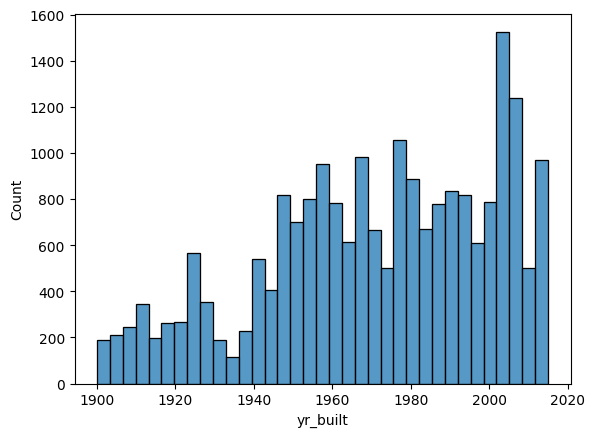

In [55]:
sns.histplot(data = kcm.yr_built)

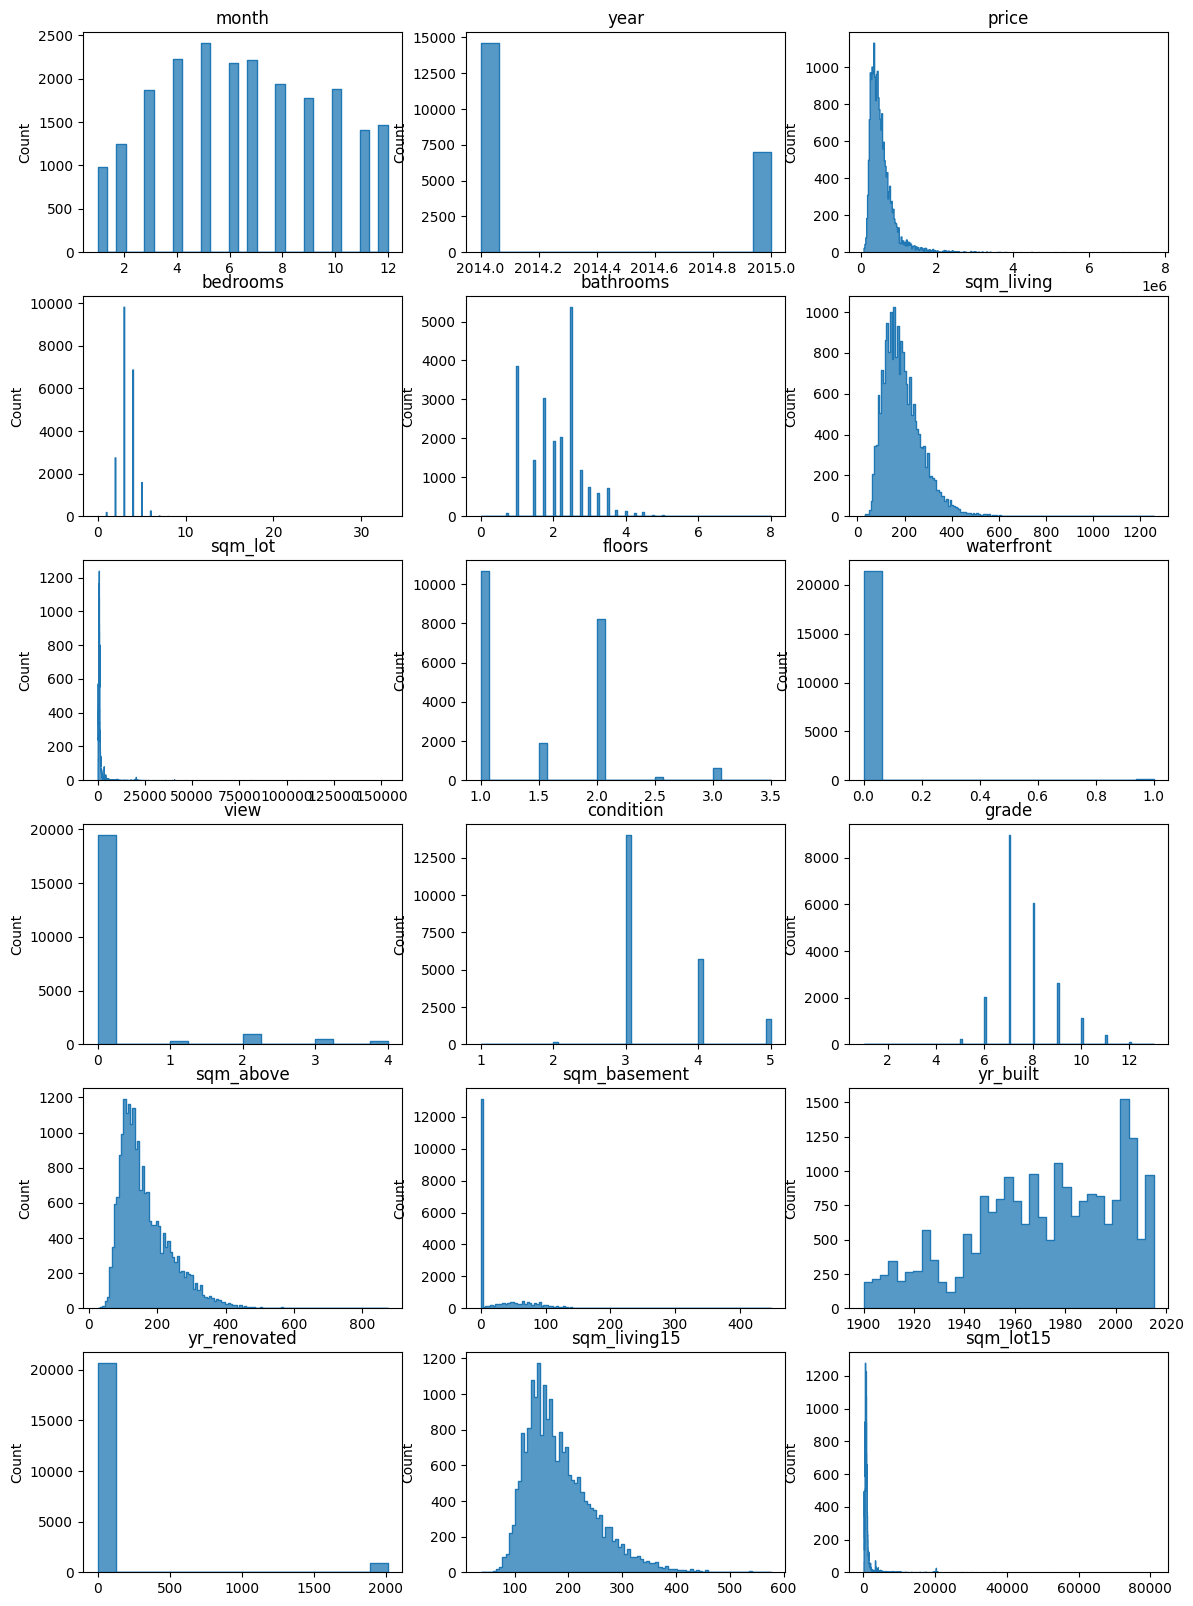

In [65]:
plotcols = 3
fig, axs = plt.subplots(6, plotcols, figsize=(14, 20))
j=0
for col in kcm.columns:
    sns.histplot(data=kcm[col], ax = axs[j//plotcols,j%plotcols], element = 'step').set(xlabel = '')
    axs[j//plotcols,j%plotcols].set_title(col)
    j+=1